# Space X Falcon 9 First Stage Landing Prediction
### (Web scraping Falcon 9 and Falcon Heavy Launches Records from Wikipedia)

### Objectives
#### Web scrap Falcon 9 launch records with BeautifulSoup:
##### Extract a Falcon 9 launch records HTML table from Wikipedia
##### Parse the table and convert it into a Pandas data frame

## First let's import required packages

In [17]:
import sys
import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd

##  Functions for  process web scraped HTML table

In [19]:
def date_time(table_cells):
    """
    This function returns the data and time from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    """
    This function returns the booster version from the HTML  table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=''.join([booster_version for i,booster_version in enumerate( table_cells.strings) if i%2==0][0:-1])
    return out

def landing_status(table_cells):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=[i for i in table_cells.strings][0]
    return out


def get_mass(table_cells):
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass


def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()
        
    colunm_name = ' '.join(row.contents)
    
    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name    


##  To scrape the data from a snapshot of the List of Falcon 9 and Falcon Heavy launches Wikipage updated on 9th June 2021

In [21]:
static_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

## TASK 1: Request the Falcon9 Launch Wiki page from its URL

In [23]:
# Step 1: Perform HTTP GET request
response = requests.get(static_url)

# Step 2: Create BeautifulSoup object
soup = BeautifulSoup(response.text, 'html.parser')

# Step 3: Print the page title to verify
print(soup.title)

<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>


## TASK 2: Extract all column/variable names from the HTML table header

In [25]:
# Find All Tables:

In [26]:
html_tables = soup.find_all('table')

In [27]:
# Identify the Target Table (Third Table):

In [28]:
first_launch_table = html_tables[2]  # Index 2 = third table (0-based indexing)
print(first_launch_table)

<table class="wikitable plainrowheaders collapsible" style="width: 100%;">
<tbody><tr>
<th scope="col">Flight No.
</th>
<th scope="col">Date and<br/>time (<a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">UTC</a>)
</th>
<th scope="col"><a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">Version,<br/>Booster</a> <sup class="reference" id="cite_ref-booster_11-0"><a href="#cite_note-booster-11"><span class="cite-bracket">[</span>b<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Launch site
</th>
<th scope="col">Payload<sup class="reference" id="cite_ref-Dragon_12-0"><a href="#cite_note-Dragon-12"><span class="cite-bracket">[</span>c<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Payload mass
</th>
<th scope="col">Orbit
</th>
<th scope="col">Customer
</th>
<th scope="col">Launch<br/>outcome
</th>
<th scope="col"><a href="/wiki/Falcon_9_first-stage_landing_tests" title="Falcon 

In [29]:
# Extract Column Names from Table Headers:

In [30]:
# Find all header cells (<th>) in the table
headers = first_launch_table.find_all('th')

# Extract text from each header and clean whitespace
column_names = [header.text.strip() for header in headers]

print(column_names)

['Flight No.', 'Date andtime (UTC)', 'Version,Booster [b]', 'Launch site', 'Payload[c]', 'Payload mass', 'Orbit', 'Customer', 'Launchoutcome', 'Boosterlanding', '1', '2', '3', '4', '5', '6', '7']


## TASK 3: Create a data frame by parsing the launch HTML tables

##### We will create an empty dictionary with keys from the extracted column names in the previous task. Later, this dictionary will be converted into a Pandas dataframe

In [33]:
launch_dict= dict.fromkeys(column_names)

# Remove an irrelvant column
del launch_dict['Date andtime (UTC)']

# Let's initial the launch_dict with each value to be an empty list
launch_dict['Flight No.'] = []
launch_dict['Launch site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []
# Added some new columns
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]

In [34]:
# Next, we just need to fill up the launch_dict with launch records extracted from table rows.

In [35]:
extracted_row = 0
#Extract each table 
for table_number,table in enumerate(soup.find_all('table',"wikitable plainrowheaders collapsible")):
   # get table row 
    for rows in table.find_all("tr"):
        #check to see if first table heading is as number corresponding to launch a number 
        if rows.th:
            if rows.th.string:
                flight_number=rows.th.string.strip()
                flag=flight_number.isdigit()
        else:
            flag=False
        #get table element 
        row=rows.find_all('td')
        #if it is number save cells in a dictonary 
        if flag:
            extracted_row += 1
            # Flight Number value
            # TODO: Append the flight_number into launch_dict with key `Flight No.`
            #print(flight_number)
            datatimelist=date_time(row[0])
            
            # Date value
            # TODO: Append the date into launch_dict with key `Date`
            date = datatimelist[0].strip(',')
            #print(date)
            
            # Time value
            # TODO: Append the time into launch_dict with key `Time`
            time = datatimelist[1]
            #print(time)
              
            # Booster version
            # TODO: Append the bv into launch_dict with key `Version Booster`
            bv=booster_version(row[1])
            if not(bv):
                bv=row[1].a.string
            print(bv)
            
            # Launch Site
            # TODO: Append the bv into launch_dict with key `Launch Site`
            launch_site = row[2].a.string
            #print(launch_site)
            
            # Payload
            # TODO: Append the payload into launch_dict with key `Payload`
            payload = row[3].a.string
            #print(payload)
            
            # Payload Mass
            # TODO: Append the payload_mass into launch_dict with key `Payload mass`
            payload_mass = get_mass(row[4])
            #print(payload)
            
            # Orbit
            # TODO: Append the orbit into launch_dict with key `Orbit`
            orbit = row[5].a.string
            #print(orbit)
            
            # Customer
            # TODO: Append the customer into launch_dict with key `Customer`
            customer = row[6].a.string if row[6].a else None
            #print(customer)
            
            # Launch outcome
            # TODO: Append the launch_outcome into launch_dict with key `Launch outcome`
            launch_outcome = list(row[7].strings)[0]
            #print(launch_outcome)
            
            # Booster landing
            # TODO: Append the launch_outcome into launch_dict with key `Booster landing`
            booster_landing = landing_status(row[8])
            #print(booster_landing)

F9 v1.07B0003.18
F9 v1.07B0004.18
F9 v1.07B0005.18
F9 v1.07B0006.18
F9 v1.07B0007.18
F9 v1.17B10038
F9 v1.1
F9 v1.1
F9 v1.1
F9 v1.1
F9 v1.1
F9 v1.1[
F9 v1.1[
F9 v1.1[
F9 v1.1[
F9 v1.1[
F9 v1.1[
F9 v1.1[
F9 v1.1[
F9 FT[
F9 v1.1[
F9 FT[
F9 FT[
F9 FT[
F9 FT[
F9 FT[
F9 FT[
F9 FT[
F9 FT[
F9 FT[
F9 FT[
F9 FT♺[
F9 FT[
F9 FT[
F9 FT[
F9 FTB1029.2195
F9 FT[
F9 FT[
F9 B4[
F9 FT[
F9 B4[
F9 B4[
F9 FTB1031.2220
F9 B4[
F9 FTB1035.2227
F9 FTB1036.2227
F9 B4[
F9 FTB1032.2245
F9 FTB1038.2268
F9 B4[
F9 B4B1041.2268
F9 B4B1039.2292
F9 B4[
F9 B5311B1046.1268
F9 B4B1043.2322
F9 B4B1040.2268
F9 B4B1045.2336
F9 B5
F9 B5349B1048[
F9 B5B1046.2354
F9 B5[
F9 B5B1048.2364
F9 B5B1047.2268
F9 B5B1046.3268
F9 B5[
F9 B5[
F9 B5B1049.2397
F9 B5B1048.3399
F9 B5[]413
F9 B5[
F9 B5B1049.3434
F9 B5B1051.2420
F9 B5B1056.2465
F9 B5B1047.3472
F9 B5
F9 B5[
F9 B5B1056.3482
F9 B5
F9 B5
F9 B5
F9 B5
F9 B5
F9 B5
F9 B5
F9 B5[
F9 B5
F9 B5
F9 B5
F9 B5B1058.2544
F9 B5
F9 B5B1049.6544
F9 B5
F9 B5B1060.2563
F9 B5B1058.3565
F9 B5B1051.6568


In [36]:
# After fill in the parsed launch record values into launch_dict, now we can create a dataframe from it.

In [37]:
df= pd.DataFrame({ key:pd.Series(value) for key, value in launch_dict.items() })

### Now we can Export it to a CSV file

In [39]:
df.to_csv('spacex_web_scraped.csv', index=False)

### Now we can Import spacex_web_scraped.csv

In [41]:
data = pd.read_csv("spacex_web_scraped.csv")
data

,Flight No.,"Version,Booster [b]",Launch site,Payload[c],Payload mass,Orbit,Customer,Launchoutcome,Boosterlanding,1,...,4,5,6,7,Payload,Launch outcome,Version Booster,Booster landing,Date,Time


#  Data wrangling

### Objectives
#### Perform exploratory Data Analysis and determine Training Labels

##### Exploratory Data Analysis
##### Determine Training Labels

### Data Analysis
#### Load Space X dataset, from last section.

In [45]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


In [46]:
# Identify and calculate the percentage of the missing values in each attribute

In [47]:
df.isnull().sum()/len(df)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [48]:
# Identify which columns are numerical and categorical:

In [49]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

### TASK 1: Calculate the number of launches on each site

In [51]:
# Use the method value_counts() on the column LaunchSite to determine the number of launches on each site:

In [52]:
df["LaunchSite"].value_counts()

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

### TASK 2: Calculate the number and occurrence of each orbit

In [54]:
df["Orbit"].value_counts()

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

### TASK 3: Calculate the number and occurence of mission outcome of the orbits

In [56]:
# Use the method .value_counts() on the column Outcome to determine the number of landing_outcomes.Then assign it to a variable landing_outcomes.

In [57]:
landing_outcomes = df["Outcome"].value_counts()
landing_outcomes

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

In [58]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [59]:
# We create a set of outcomes where the second stage did not land successfully:

In [60]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

### TASK 4: Create a landing outcome label from Outcome column

In [62]:
# Using the Outcome, create a list where the element is zero if the corresponding row in Outcome is in the set bad_outcome; otherwise, it's one. Then assign it to the variable landing_class:

In [63]:
# Create landing_class: 0 for bad outcomes, 1 otherwise
df['landing_class'] = df['Outcome'].apply(lambda x: 0 if x in bad_outcomes else 1)

In [64]:
# Verify results
print(df[['Outcome', 'landing_class']].head(10))

       Outcome  landing_class
0    None None              0
1    None None              0
2    None None              0
3  False Ocean              0
4    None None              0
5    None None              0
6   True Ocean              1
7   True Ocean              1
8    None None              0
9    None None              0


In [65]:
# determine the success rate:

In [66]:
df["landing_class"].mean()

0.6666666666666666

In [67]:
# Now export to csv file

In [68]:
df.to_csv("dataset_part_2.csv", index=False)

### Objectives
##### Perform exploratory Data Analysis and Feature Engineering using Pandas and Matplotlib
##### Exploratory Data Analysis
##### Preparing Data Feature Engineering

In [70]:
# Import Libraries and Define Auxiliary Functions

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv("dataset_part_2.csv")
df

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,landing_class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


In [73]:
# First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

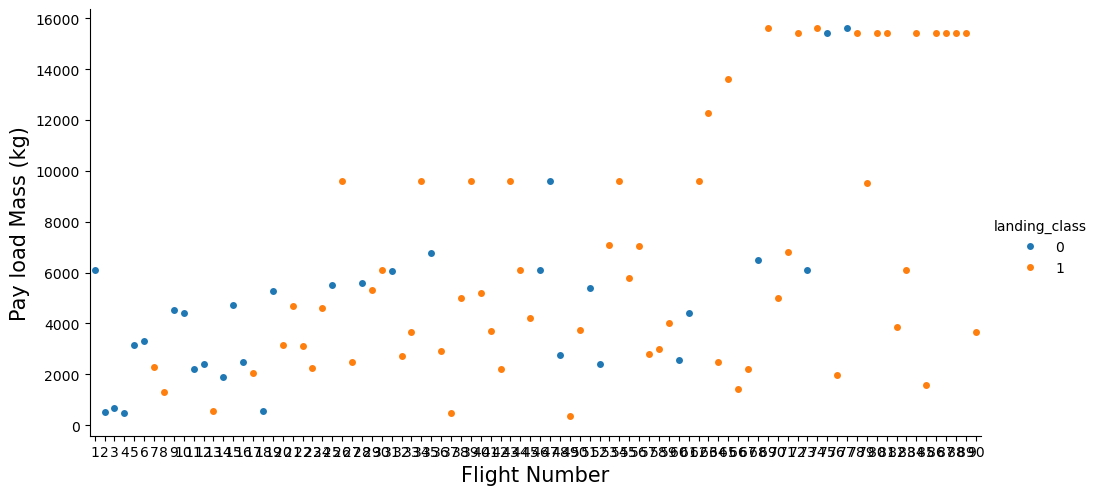

In [74]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="landing_class", data=df, aspect = 2)
plt.xlabel("Flight Number",fontsize=15)
plt.ylabel("Pay load Mass (kg)",fontsize=15)
plt.show()

In [75]:
# let's drill down to each site visualize its detailed launch records.

### TASK 1: Visualize the relationship between Flight Number and Launch Site

In [77]:
# Use the function catplot to plot FlightNumber vs LaunchSite, set the parameter x parameter to FlightNumber,set the y to Launch Site and set the parameter hue to 'class'

In [78]:
# Visualize by catplot

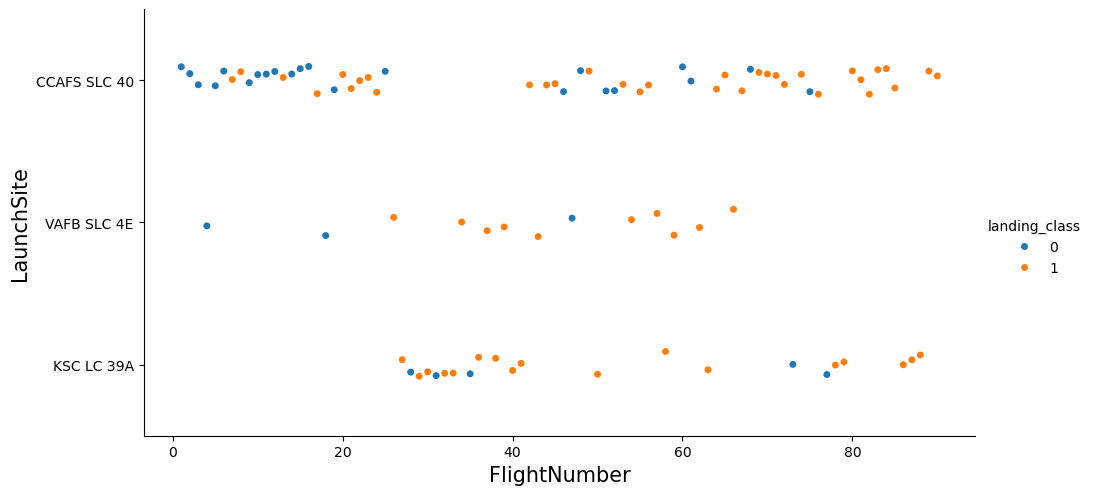

In [79]:
sns.catplot(y = "LaunchSite", x = "FlightNumber", hue="landing_class", data = df, aspect = 2 )
plt.xlabel("FlightNumber",fontsize=15)
plt.ylabel("LaunchSite",fontsize=15)
plt.show()

In [80]:
# Visualize by scatterplot

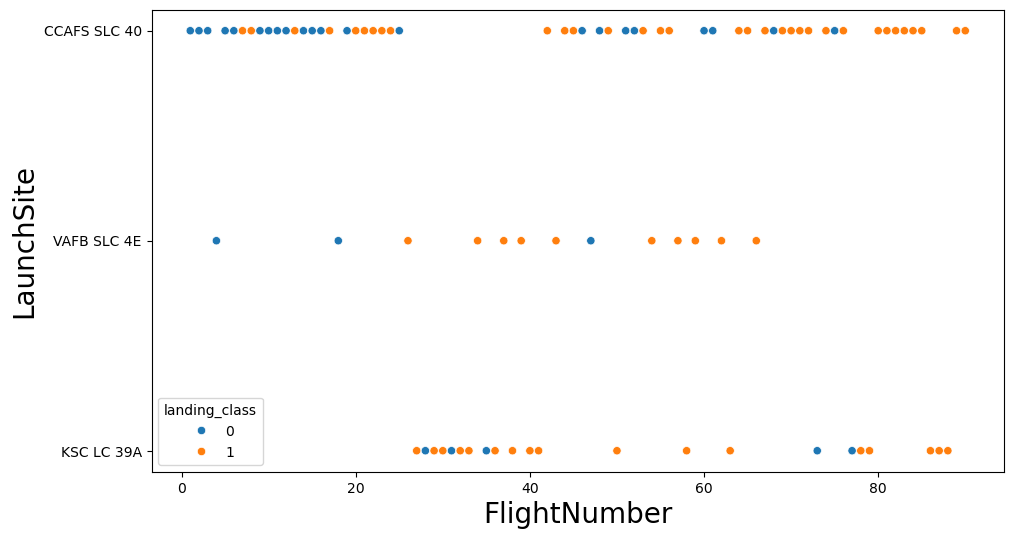

In [81]:
plt.figure(figsize=(11, 6)) 
sns.scatterplot(y = "LaunchSite", x = "FlightNumber", hue="landing_class", data = df)
plt.xlabel("FlightNumber",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

### TASK 2: Visualize the relationship between Payload Mass and Launch Site

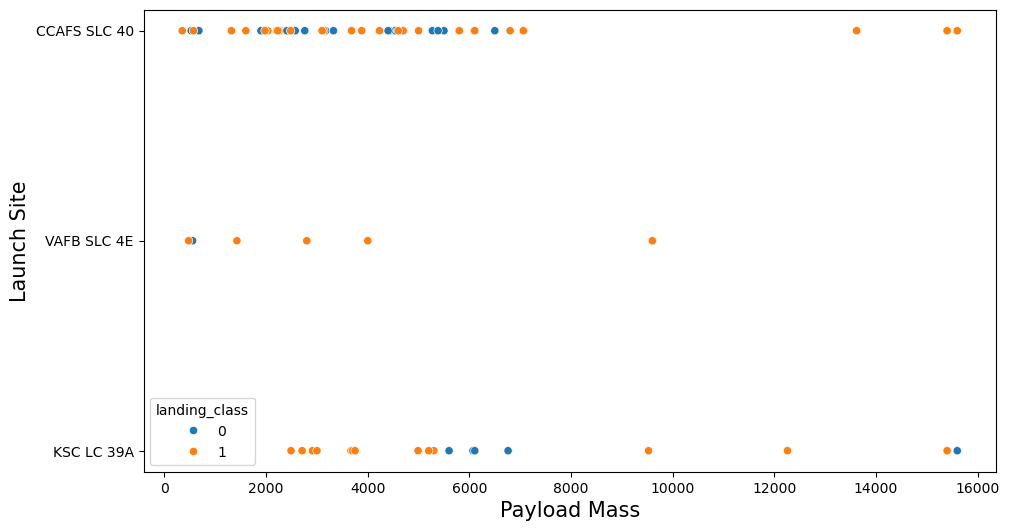

In [83]:
plt.figure(figsize=(11, 6)) 
sns.scatterplot(y = "LaunchSite", x = "PayloadMass", hue="landing_class", data = df)
plt.xlabel("Payload Mass",fontsize=15)
plt.ylabel("Launch Site",fontsize=15)
plt.show()

#### Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).

### TASK 3: Visualize the relationship between success rate of each orbit type

In [86]:
# Group by Orbit and calculate success rate

In [87]:
orbit_success = df.groupby("Orbit")["landing_class"].mean().reset_index()

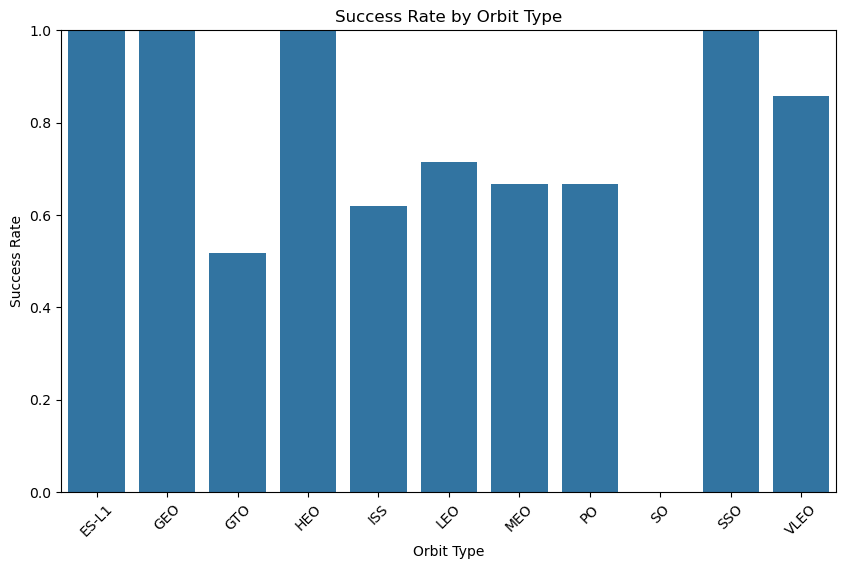

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Orbit", y="landing_class", data=orbit_success)

plt.title("Success Rate by Orbit Type")
plt.xlabel("Orbit Type")
plt.ylabel("Success Rate")
plt.ylim(0, 1)  # Since success rate is between 0 and 1
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.show()

### TASK 4: Visualize the relationship between FlightNumber and Orbit type

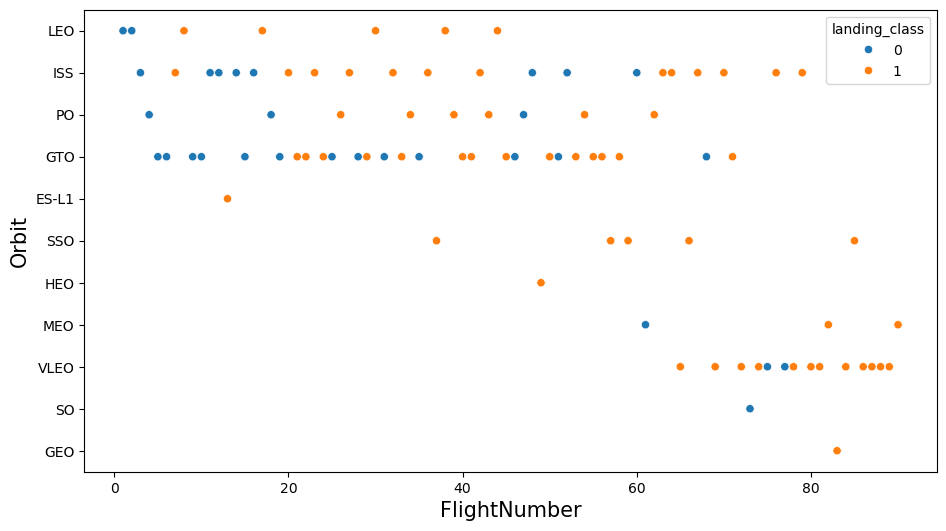

In [90]:
plt.figure(figsize=(11, 6)) 
sns.scatterplot(y = "Orbit", x = "FlightNumber", hue="landing_class", data = df)
plt.xlabel("FlightNumber",fontsize=15)
plt.ylabel("Orbit",fontsize=15)
plt.show()

### You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.

### TASK 5: Visualize the relationship between Payload Mass and Orbit type

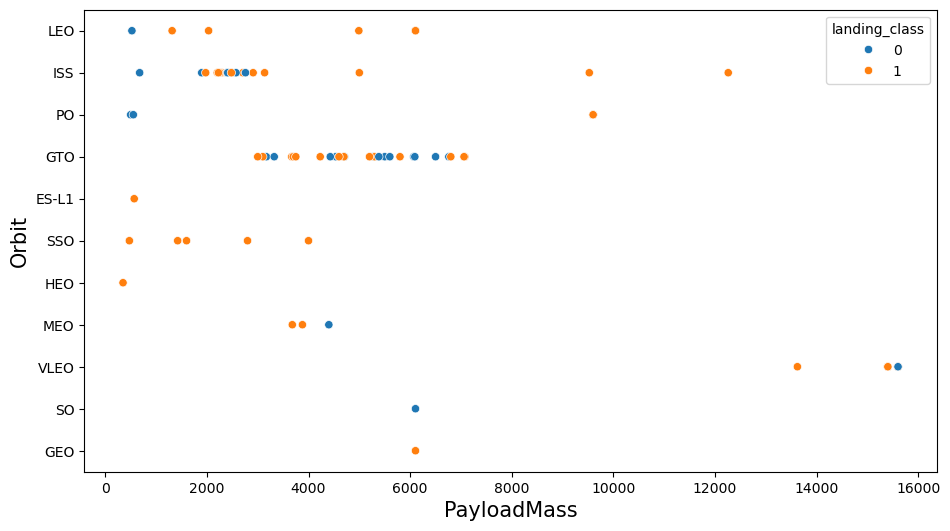

In [93]:
plt.figure(figsize=(11, 6)) 
sns.scatterplot(y = "Orbit", x = "PayloadMass", hue="landing_class", data = df)
plt.xlabel("PayloadMass",fontsize=15)
plt.ylabel("Orbit",fontsize=15)
plt.show()

### With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS. However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present

### TASK 6: Visualize the launch success yearly trend

In [96]:
# A function to Extract years from the date

In [97]:
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,landing_class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [98]:
# Plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.

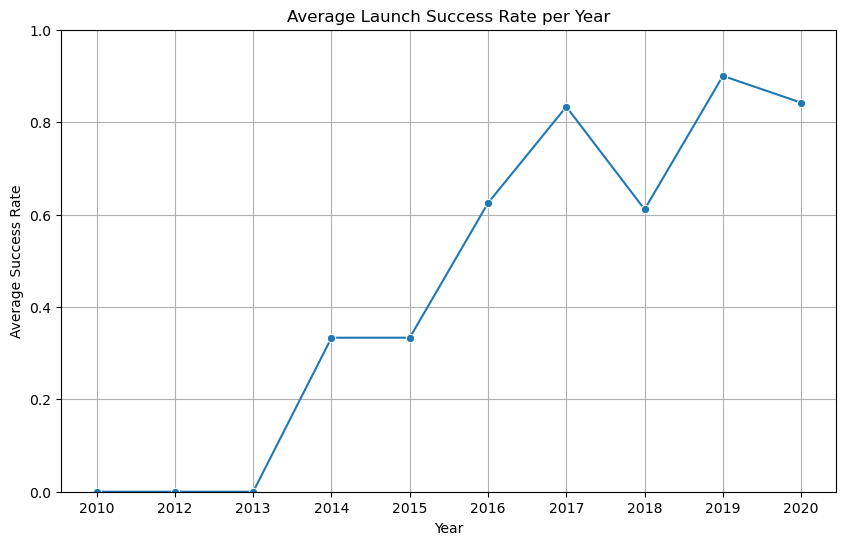

In [99]:
# Step 2: Group by year and calculate average success rate
yearly_success = df.groupby("Date")["landing_class"].mean().reset_index()
yearly_success.rename(columns={"Date": "Year", "landing_class": "SuccessRate"}, inplace=True)

plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="SuccessRate", data=yearly_success, marker="o")

# Customize the chart
plt.title("Average Launch Success Rate per Year")
plt.xlabel("Year")
plt.ylabel("Average Success Rate")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

### you can observe that the sucess rate since 2013 kept increasing till 2020

### By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [102]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK 7: Create dummy variables to categorical columns

#### Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head.

In [105]:
# Apply one-hot encoding to categorical columns

In [106]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [107]:
features_one_hot.dtypes

FlightNumber      int64
PayloadMass     float64
Flights           int64
GridFins           bool
Reused             bool
                 ...   
Serial_B1056       bool
Serial_B1058       bool
Serial_B1059       bool
Serial_B1060       bool
Serial_B1062       bool
Length: 80, dtype: object

### TASK 8: Cast all numeric columns to float64

In [109]:
features_one_hot = features_one_hot.astype('float64')
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

In [111]:
### Export to scv file

In [112]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

# Interactive Visual Analytics with Folium

In [114]:
import folium
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

### Task 1: Mark all launch sites on a map

In [116]:
# First, let's try to add each site's location on a map using site's latitude and longitude coordinates
# The following dataset with the name spacex_launch_geo.csv is an augmented dataset with latitude and longitude added for each site.

In [117]:
spacex_df =pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv")
spacex_df.head()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",0.0,LEO (ISS),NASA (COTS) NRO,Failure (parachute),0,28.562302,-80.577356
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525.0,LEO (ISS),NASA (COTS),No attempt,0,28.562302,-80.577356
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356


In [118]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`

In [119]:
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [120]:
# We first need to create a folium Map object, with an initial center location to be NASA Johnson Space Center at Houston, Texas.

In [121]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)
site_map

In [122]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

###  Task 2: Mark the success/failed launches for each site on the map

In [124]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


In [125]:
marker_cluster = MarkerCluster()
marker_cluster

In [126]:
# Apply a function to check the value of `class` column
# If class=1, marker_color value will be green
# If class=0, marker_color value will be red

In [127]:
# Add marker_cluster to current site_map
site_map.add_child(marker_cluster)

# for each row in spacex_df data frame
# create a Marker object with its coordinate
# and customize the Marker's icon property to indicate if this launch was successed or failed, 
# e.g., icon=folium.Icon(color='white', icon_color=row['marker_color']
for index, record in spacex_df.iterrows():
    # TODO: Create and add a Marker cluster to the site map
    # marker = folium.Marker(...)
    marker_cluster.add_child(marker)

site_map

### TASK 3: Calculate the distances between a launch site to its proximities

In [129]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

In [130]:
# Create base map
launch_map = folium.Map(location=[spacex_df['Lat'].mean(), spacex_df['Long'].mean()], zoom_start=5)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(launch_map)

# Loop through the DataFrame and add markers
for index, row in spacex_df.iterrows():
    coordinate = [row['Lat'], row['Long']]
    popup_text = f"Launch Site: {row['Launch Site']}<br>Result: {'Success' if row['class'] == 1 else 'Failure'}"
    
    folium.Marker(
        location=coordinate,
        popup=popup_text,
        icon=folium.Icon(color='green' if row['class'] == 1 else 'red', icon='rocket', prefix='fa')
    ).add_to(marker_cluster)

# Display the map
launch_map

### Machine Learning Prediction

### 1. Load and Explore Data

In [172]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load datasets
url1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"

# Target variable (Class)
data = pd.read_csv(url1)
# Features
X = pd.read_csv(url2)

## Task 1: Create Y as a Pandas Series

In [175]:
Y = data['Class']  # Directly extract as a Pandas Series
print("Y type:", type(Y))  # Verify: <class 'pandas.core.series.Series'>

Y type: <class 'pandas.core.series.Series'>


## 3. Task 2: Standardize Features in X

In [178]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize data (mean=0, std=1)
X = pd.DataFrame(X_scaled, columns=X.columns)  # Reassign as DataFrame

## 4. Task 3: Split Data into Training/Test Sets

In [181]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=0.2, 
    random_state=2, 
    stratify=Y  # Preserve class distribution
)
print("Training/Test Shapes:", X_train.shape, X_test.shape)

Training/Test Shapes: (72, 83) (18, 83)


## 5. Task 4-11: Train Models with GridSearchCV

In [184]:
# 5.1 Logistic Regression

In [188]:
# Define parameter grid
logreg_params = {
    'C': [0.01, 0.1, 1, 10], 
    'penalty': ['l2'], 
    'solver': ['lbfgs']
}

# Initialize GridSearchCV
logreg_cv = GridSearchCV(
    LogisticRegression(), 
    logreg_params, 
    cv=10, 
    scoring='accuracy'
)
logreg_cv.fit(X_train, Y_train)

# Best accuracy on test data
logreg_accuracy = logreg_cv.score(X_test, Y_test)
print("Logistic Regression Test Accuracy:", round(logreg_accuracy, 2))

Logistic Regression Test Accuracy: 0.83


In [190]:
# 5.2 Support Vector Machine (SVM)abs

In [232]:
svm_params = {
    'C': [0.1, 1, 10], 
    'kernel': ['linear', 'rbf']
}

svm_cv = GridSearchCV(SVC(), svm_params, cv=10, scoring='accuracy')
svm_cv.fit(X_train, Y_train)
svm_accuracy = svm_cv.score(X_test, Y_test)
print("SVM Test Accuracy:", round(svm_accuracy, 2))

SVM Test Accuracy: 0.78


In [196]:
# 5.3 Decision Tree

In [200]:
tree_params = {
    'max_depth': [3, 5, 7, None], 
    'min_samples_split': [2, 5, 10]
}

tree_cv = GridSearchCV(
    DecisionTreeClassifier(), 
    tree_params, 
    cv=10, 
    scoring='accuracy'
)
tree_cv.fit(X_train, Y_train)
tree_accuracy = tree_cv.score(X_test, Y_test)
print("Decision Tree Test Accuracy:", round(tree_accuracy, 2))

Decision Tree Test Accuracy: 0.72


In [202]:
# 5.4 k-Nearest Neighbors (k-NN)

In [205]:
knn_params = {
    'n_neighbors': [3, 5, 7, 10], 
    'weights': ['uniform', 'distance']
}

knn_cv = GridSearchCV(
    KNeighborsClassifier(), 
    knn_params, 
    cv=10, 
    scoring='accuracy'
)
knn_cv.fit(X_train, Y_train)
knn_accuracy = knn_cv.score(X_test, Y_test)
print("k-NN Test Accuracy:", round(knn_accuracy,2))

k-NN Test Accuracy: 0.78


## Best_tree 6. Task 12: Compare Model Accuracies

In [213]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'k-NN'],
    'Test Accuracy': [logreg_accuracy, svm_accuracy, tree_accuracy, knn_accuracy]
})

# Sort by accuracy (descending)
results_sorted = results.sort_values(by='Test Accuracy', ascending=False)
print("\nModel Performance Comparison:\n", results_sorted)


Model Performance Comparison:
                  Model  Test Accuracy
0  Logistic Regression       0.833333
1                  SVM       0.777778
3                 k-NN       0.777778
2        Decision Tree       0.722222


## **Conclusion**
**1. As the number of flights increases, the rate of success at a launch site increases, with most early flights being unsuccessful.
i.e with more experience, the success rate increases.**\
 Between 2010 and 2013, all landings were unsuccessful (as the success rate is 0).\
 After 2013, the success rate generally increased, despite small dips in 2018 and 2020.\
 After 2016. there was always a  greater than 50% chance of success.

**2. Orbit types ES-L1, GEO, HEO, and SSO, have the highest 100% success rate.**\
 The 100% success rate of GEO, HEO and ES-L1 orbits can be explained by only having 1 flight into the respective orbits.\
 The 100% success rate in SSO is more impressive, with 5 successful flights.\
 The orbit types PO, ISS, and LEO, have more success with heavy payloads.\
 VLEO (Very Low Earth Orbit) launches are associated with heavier payloads, which makes intuitive sense.

**3. The lauch site KSCLC-39 A had the most successful launches, with 41.7% of the total successful launches, and also the highest rate of successful
     launches, with a 76.9% success rate.**

**4. The success for massive payloads (over 4000 kg) is lower than that for low payloads.**

**5. The best perfoming clasification model is the Logistic Regression model. with an accuracy of 83%.**